# Descrição
Este notebook é um estudo sobre a rotatividade de funcionários em uma empresa.

## Metodologia
* Análise Descritiva: Estatísticas básicas e visualizações.
* Teste t Student: Comparação de médias entre grupos.

## TL;DR
A análise revelou um período de crescimento acentuado da empresa chegando a 650 funcionários, seguido por um desligamento massivo de 144 funcionários (22% da empresa) em um único dia, indicando um layoff. Há forte indício de que critérios de desligamento foram adotados.

### Sêniores:
- Funcionários desligados trabalharam em média 102% a mais em horas extras do que os ativos, com uma pontuação de desempenho 14.9% superior. No entanto, tinham uma satisfação no trabalho significativamente mais baixa (-15%).
- **Recomendação:** Revisar critérios de desligamento, ajustar a carga de trabalho e feedback contínuo dos funcionários.

### Plenos:
- Não houve um critério claro observado para os desligamentos, apesar dos funcionários desligados apresentarem maior desempenho (19.2%) e satisfação no trabalho (10%) em comparação aos ativos.
- **Recomendação:** Definir e informar os critérios claros de retenção de funcionários Plenos.

### Juniors:
- Funcionários juniores desligados tinham menos meses de serviço em média (-17%) em comparação aos ativos.
- **Recomendação:** Implementar programas de integração e desenvolvimento profissional para reter talentos na empresa.

## Base de Dados
1º Desafio de Dados - Ciência de Dados em Recursos Humanos.

Owner: Data Viking (https://www.youtube.com/@DataVikingx)

Downloads: [Google Drive](https://drive.google.com/drive/folders/1xiFRo6tiriU85vf3_rFGWwklI1iRrZsp)

## Autor do Notebook
Pedro Kaneko  
[LinkedIn](https://www.linkedin.com/in/pedrokaneko)

## Data
24 de Maio de 2024


# Bibliotecas

In [2]:
import sys
import pandas as pd
import plotly
import plotly.express as px
import plotly.io as pio
import scipy
from scipy.stats import ttest_ind, levene

# Versões das Bibliotecas
print('Versões das Bibliotecas')
print(f'Python: {sys.version}')
print(f'pandas: {pd.__version__}')
print(f'plotly: {plotly.__version__}')
print(f'scipy: {scipy.__version__}')

Versões das Bibliotecas
Python: 3.11.9 | packaged by Anaconda, Inc. | (main, Apr 19 2024, 16:40:41) [MSC v.1916 64 bit (AMD64)]
pandas: 2.2.2
plotly: 5.22.0
scipy: 1.14.0


# Importar

In [3]:
# Diretório para salvar as imagens
path = "E:\git\Turnover_Analysis"

In [4]:
# identificando as planilhas do arquivo xlsx
xls = pd.ExcelFile("Base_dados_-_Rotatividade_RH.xlsx")
xls.sheet_names

['tab-rh']

In [5]:
# dataframe
rh = pd.read_excel(xls, 'tab-rh')
rh.head()

Data_Contratacao Data_Desligamento  Meses_de_Servico  Idade  \
0       2024-02-14               NaT                 3     24   
1       2023-11-16        2024-05-14                 6     43   
2       2023-11-16               NaT                 6     45   
3       2023-05-20               NaT                12     31   
4       2022-07-24               NaT                22     37   

   Pontuacao_Desempenho  Satisfacao_Trabalho Nivel_Cargo  Salario  \
0              2.066788             2.043644       Pleno  4994.41   
1              3.256257             1.711719      Sênior  8798.34   
2              4.827732             3.480214      Sênior  8891.02   
3              1.453944             1.617558       Pleno  7606.22   
4              2.088917             2.763390      Sênior  9236.03   

   Horas_Extras  Desligamento  
0     15.465241             0  
1     19.036627             1  
2     13.326408             0  
3     14.209663             0  
4     11.059687             0

# Análise Preliminar

In [6]:
# tipo de dados e valores nulos
rh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Data_Contratacao      650 non-null    datetime64[ns]
 1   Data_Desligamento     144 non-null    datetime64[ns]
 2   Meses_de_Servico      650 non-null    int64         
 3   Idade                 650 non-null    int64         
 4   Pontuacao_Desempenho  650 non-null    float64       
 5   Satisfacao_Trabalho   650 non-null    float64       
 6   Nivel_Cargo           650 non-null    object        
 7   Salario               650 non-null    float64       
 8   Horas_Extras          650 non-null    float64       
 9   Desligamento          650 non-null    int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(1)
memory usage: 50.9+ KB


Formatos corretos. Existem valores nulos para data de desligamento.



In [7]:
# Resumo estatístico
rh.describe()

Data_Contratacao    Data_Desligamento  Meses_de_Servico  \
count                            650                  144        650.000000   
mean   2022-10-31 06:38:46.153846272  2024-05-14 00:00:00         18.690769   
min              2021-06-29 00:00:00  2024-05-14 00:00:00          3.000000   
25%              2022-02-24 00:00:00  2024-05-14 00:00:00         10.000000   
50%              2022-10-22 00:00:00  2024-05-14 00:00:00         19.000000   
75%              2023-07-19 00:00:00  2024-05-14 00:00:00         27.000000   
max              2024-02-14 00:00:00  2024-05-14 00:00:00         35.000000   
std                              NaN                  NaN          9.652262   

            Idade  Pontuacao_Desempenho  Satisfacao_Trabalho       Salario  \
count  650.000000            650.000000           650.000000    650.000000   
mean    28.349231              3.027463             2.940577   6131.587062   
min     18.000000              1.000242             1.002868   2004.500000   
25%     22.000000              1.988753             1.968571   4023.752500   
50%     27.000000              3.058911             2.923458   5562.950000   
75%     33.000000              4.022709             3.964356   7814.480000   
max     49.000000              4.992102             4.999415  11957.290000   
std      8.014983              1.174226             1.148514   2689.075566   

       Horas_Extras  Desligamento  
count    650.000000    650.000000  
mean      10.098864      0.221538  
min        0.003734      0.000000  
25%        4.978000      0.000000  
50%        9.413546      0.000000  
75%       14.749310      0.000000  
max       41.638350      1.000000  
std        6.242406      0.415602

In [8]:
# Correlação desligamento
rh.loc[:,rh.dtypes!=object].corr()['Desligamento'].sort_values(ascending=False)

Data_Desligamento       1.000000
Desligamento            1.000000
Horas_Extras            0.190657
Pontuacao_Desempenho    0.131827
Data_Contratacao        0.064710
Idade                   0.007267
Salario                -0.006518
Satisfacao_Trabalho    -0.025693
Meses_de_Servico       -0.064710
Name: Desligamento, dtype: float64

Entendendo a relação entre entre idade e salário e nível de cargo.

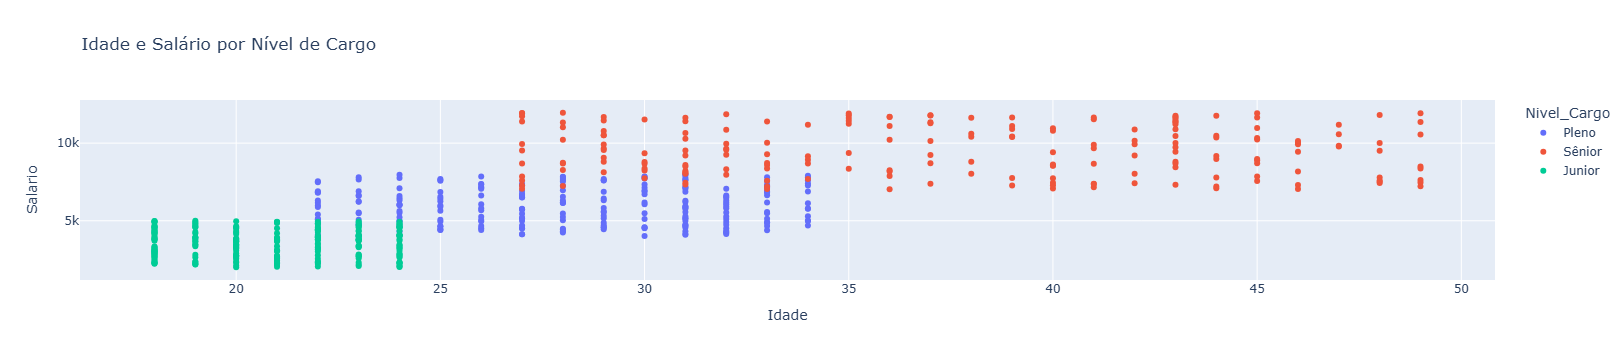

In [9]:
# Relação Idade e Salário por Nível de Cargo
fig = px.scatter(rh, x="Idade", y="Salario", color="Nivel_Cargo",
                 color_continuous_scale='Picnic',
                 title="Idade e Salário por Nível de Cargo")
fig.show()

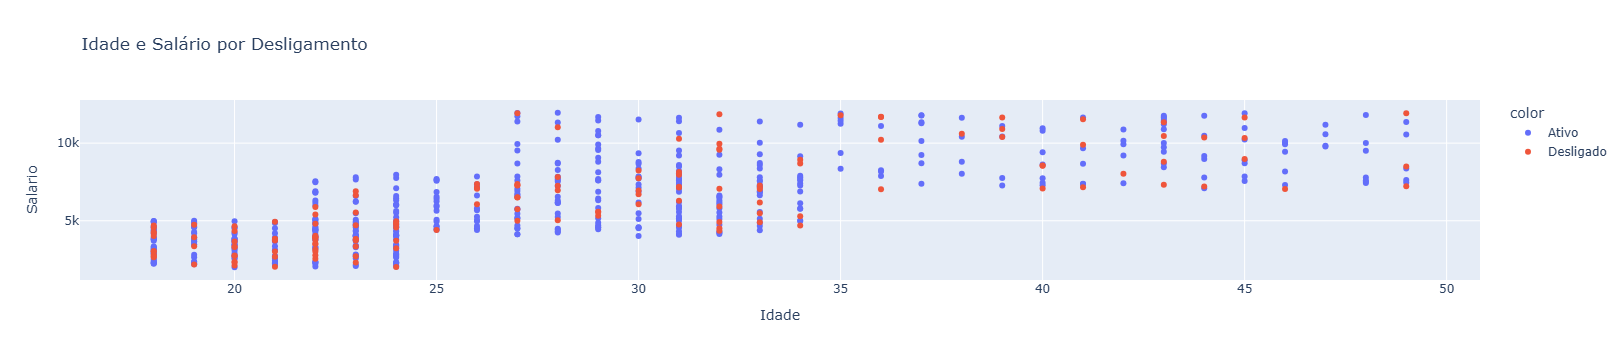

In [10]:
# Relação Idade e Salário por Desligamento
fig = px.scatter(rh, x="Idade", y="Salario", color=rh['Desligamento'].map({0: 'Ativo', 1: 'Desligado'}),
                 title="Idade e Salário por Desligamento")
fig.show()

O gráfico acima foi desenvolvido para identificar uma possível relação entre salário idade e desligamento. Porém não há nenhum tipo de padrão de desligamento aparente.

## Resumo

In [11]:
# Resumo dos funcionários por nivel de cargo: Desligados, ativos, total, turnover.

resume = pd.crosstab(rh['Nivel_Cargo'], rh['Desligamento'].map({0: 'Ativo', 1: 'Desligado'}), margins=True)
resume['Turnover'] = round(resume['Desligado'] / resume['All'],3)

print('Resumo: Desligados, ativos, total, turnover por nível de cargo.')
resume

Resumo: Desligados, ativos, total, turnover por nível de cargo.


Desligamento  Ativo  Desligado  All  Turnover
Nivel_Cargo                                  
Junior          177         56  233     0.240
Pleno           180         45  225     0.200
Sênior          149         43  192     0.224
All             506        144  650     0.222

## Conclusão
De 650 funcionários 144 foram desligados. Isso corresponde a um turnover de 22 %. Proporcionalmene os funcionários Juniors tiveram o maior número de desligamentos: 24%.

In [12]:
# Meses de serviço funcionários ativos (Média)
rh.loc[rh.Desligamento==0].groupby('Nivel_Cargo').Meses_de_Servico.mean()

Nivel_Cargo
Junior    19.186441
Pleno     19.305556
Sênior    18.489933
Name: Meses_de_Servico, dtype: float64

In [13]:
# Meses de serviço funcionários desligados (Média)
rh.loc[rh.Desligamento==1].groupby('Nivel_Cargo').Meses_de_Servico.mean()

Nivel_Cargo
Junior    15.892857
Pleno     18.555556
Sênior    18.558140
Name: Meses_de_Servico, dtype: float64

O tempo de permanência em meses Dos funcionários de nível Junior desligados é na média menor do que os ativos. Isso também ocorre para funcionários de nível pleno Mas a diferença é sutil.

# Contratações x Desligamentos

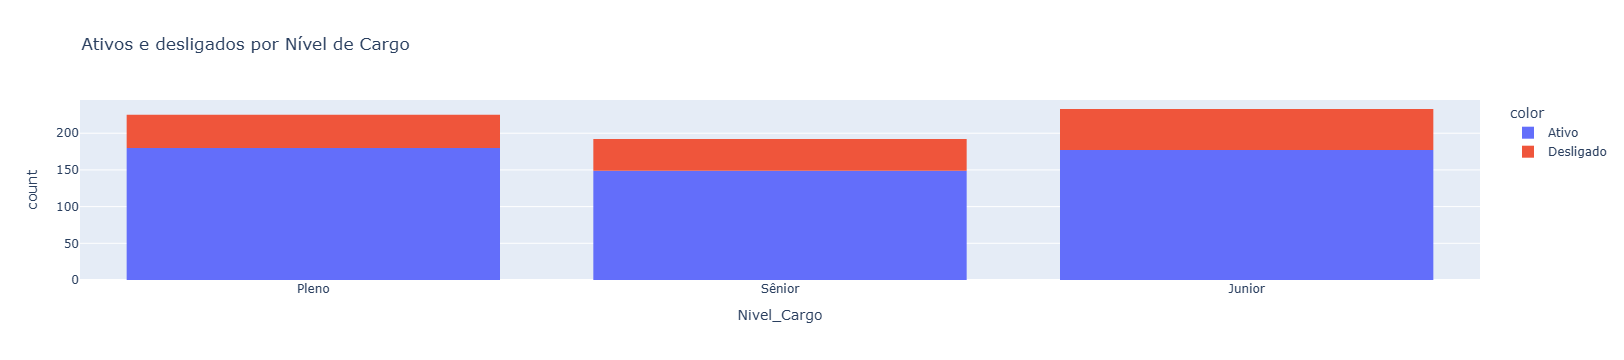

In [14]:
# visualizando ativos e desligados por nivel de cargo
fig = px.histogram(rh, x="Nivel_Cargo", color=rh['Desligamento'].map({0: 'Ativo', 1: 'Desligado'}), title="Ativos e desligados por Nível de Cargo")
fig.show()

Visualizando a distribuição de funcionários ativos e desligados por nível de cargo


## Análise Desligamentos

In [15]:
# Contagem de desligamentos por data
rh.Data_Desligamento.value_counts()

Data_Desligamento
2024-05-14    144
Name: count, dtype: int64

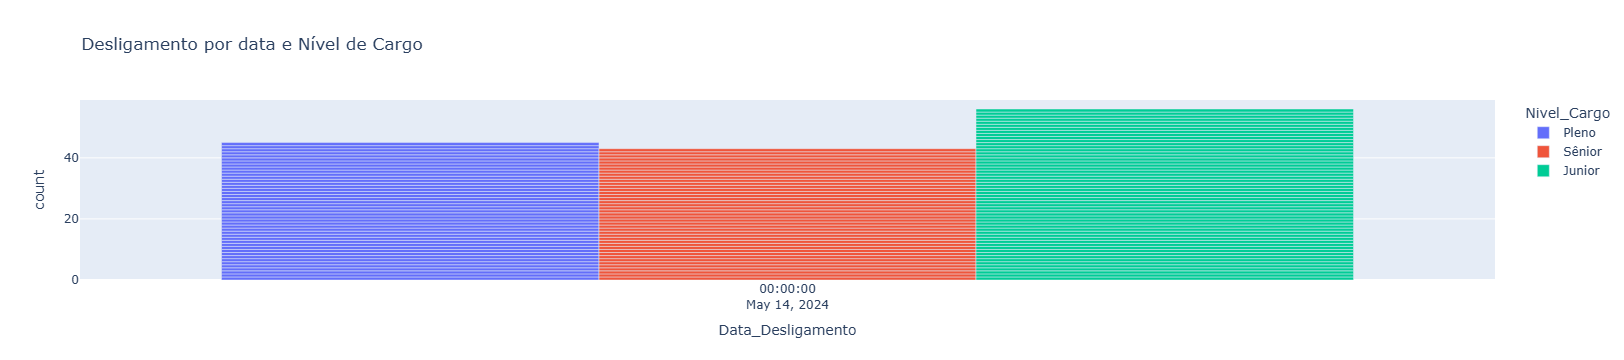

In [16]:
# visualizando os desligamentos por data
fig = px.bar(rh, x='Data_Desligamento', color='Nivel_Cargo', barmode='group',
                   title='Desligamento por data e Nível de Cargo')
fig.show()

Todos os 144 desligamentos ocorreram na data de 14 de maio desde 2024

## Análise Contratações



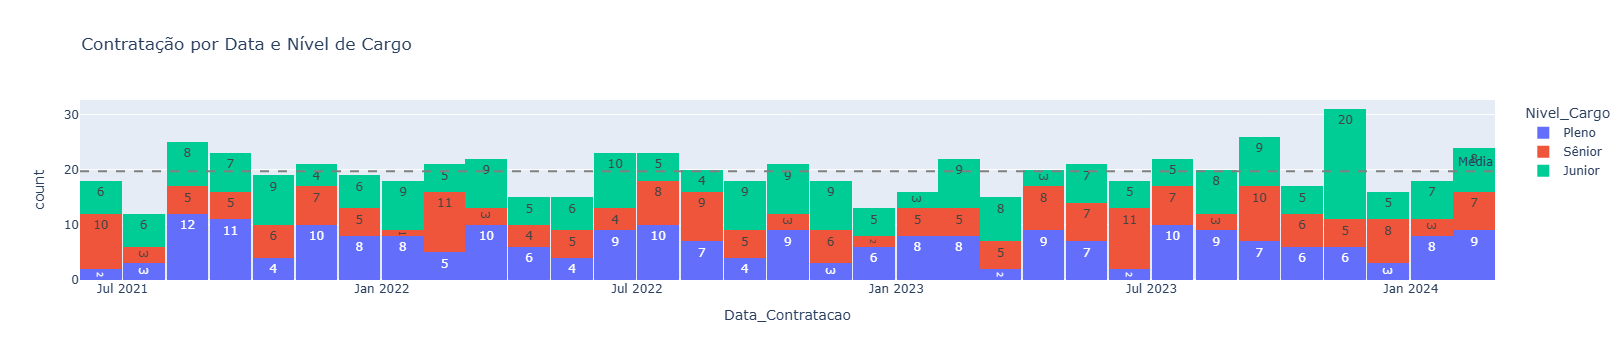

In [17]:
fig = px.histogram(rh, x= 'Data_Contratacao', color='Nivel_Cargo', nbins=rh.Data_Contratacao.nunique(), text_auto=True,
                   title='Contratação por Data e Nível de Cargo')
fig.add_hline(rh.Data_Contratacao.value_counts().mean(), line_dash="dash", line_color="gray", annotation=dict(text="Média"))
fig.show()

O gráfico representado acima mostra o número de funcionários contratados por nível de cargo e por data.
* Funcionários dos 3 níveis de cargo foram contratados em todos os ciclos.
* A média de contratação por ciclo é de 19 funcionários.

In [18]:
# Construindo um data frame completo com as informações de contratação e demissão ao longo do tempo

# Contabilizando contratações e demissões
admissions = rh['Data_Contratacao'].value_counts().sort_index()
layoffs = rh['Data_Desligamento'].value_counts().sort_index()

# Combinando admissões e demissões em um único DataFrame
events = pd.concat([admissions, -layoffs], axis=1).fillna(0)
events.columns = ['admissions', 'layoffs']

# Adicionando as datas específicas manualmente
specific_dates = pd.to_datetime(['2024-03-14', '2024-04-14'])
for date in specific_dates:
    if date not in events.index:
        events.loc[date] = [0, 0]

# Reordenando o DataFrame após a inclusão das novas datas
events = events.sort_index()

# Calculando o total acumulado de funcionários
events['net_change'] = events['admissions'] + events['layoffs']
events['total_employees'] = events['net_change'].cumsum()

# Resetando o índice e renomeando a coluna com os dados temporais
events = events.reset_index().rename(columns={'index': 'data'})

# Visualizando os resultados
print(events)

         data  admissions  layoffs  net_change  total_employees
0  2021-06-29        18.0      0.0        18.0             18.0
1  2021-07-29        12.0      0.0        12.0             30.0
2  2021-08-28        25.0      0.0        25.0             55.0
3  2021-09-27        23.0      0.0        23.0             78.0
4  2021-10-27        19.0      0.0        19.0             97.0
5  2021-11-26        21.0      0.0        21.0            118.0
6  2021-12-26        19.0      0.0        19.0            137.0
7  2022-01-25        18.0      0.0        18.0            155.0
8  2022-02-24        21.0      0.0        21.0            176.0
9  2022-03-26        22.0      0.0        22.0            198.0
10 2022-04-25        15.0      0.0        15.0            213.0
11 2022-05-25        15.0      0.0        15.0            228.0
12 2022-06-24        23.0      0.0        23.0            251.0
13 2022-07-24        23.0      0.0        23.0            274.0
14 2022-08-23        20.0      0.0      

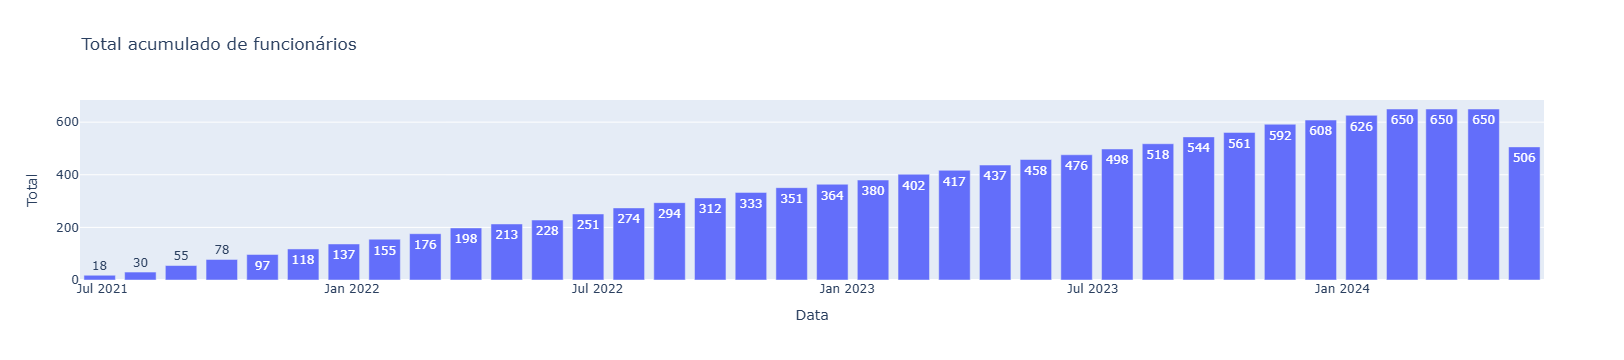

In [19]:
# Número total de funcionários por data
fig = px.bar(events, x='data', y='total_employees', text='total_employees',
             labels={'data':'Data', 'total_employees':'Total'},
             title='Total acumulado de funcionários'
             )
fig.show()

No gráfico acima podemos observar que foram admitidos funcionários mensalmente De junho de 2021 Até fevereiro de 2024. Na sequência tiveram 2 meses sem contratações E então em Maio Foram desligados 144 funcionários totalizando 506 funcionários.

In [20]:
initial_date = rh.Data_Contratacao.min()
final_date = rh.Data_Contratacao.max()
period = final_date - initial_date
period = round(int(period.days) / 365,1)

hiring_cicle = rh.Data_Contratacao.nunique()
mean_hiring_cicle = round(rh.Data_Contratacao.value_counts().mean(),2)

initial_employees = rh.Data_Contratacao.value_counts().sort_index().cumsum().min()
final_employees = rh.Data_Contratacao.value_counts().sort_index().cumsum().max()
growth_percent = round(((final_employees - initial_employees) / initial_employees) * 100,2)

info = {
    'Descrição': [
        'Data inicial de contratação',
        'Data final de contratação',
        'Período total (anos)',
        'Ciclos de contratação',
        'Média de contratações por ciclo',
        'Número inicial de contratados',
        'Acumulado',
        'Crescimento percentual'
    ],
    'Valor': [
        initial_date,
        final_date,
        period,
        hiring_cicle,
        mean_hiring_cicle,
        initial_employees,
        final_employees,
        f"{growth_percent}%"
    ]
}

rh_info = pd.DataFrame(info)
rh_info

Descrição                Valor
0      Data inicial de contratação  2021-06-29 00:00:00
1        Data final de contratação  2024-02-14 00:00:00
2             Período total (anos)                  2.6
3            Ciclos de contratação                   33
4  Média de contratações por ciclo                 19.7
5    Número inicial de contratados                   18
6                        Acumulado                  650
7           Crescimento percentual             3511.11%

Na tabela acima podemos ver que em um período inferior a 3 anos, ocorreu um aumento de 3511.11% no número de funcionários contratados.

### Resumo
Os 144 desligamentos ocorreram na mesma data. Isso sugere um layoff.
Contextualizando as possibilidades de contratação crescente seguido da demissão em massa.

> **Influência de fatores externos:** No período da pandemia do COVID-19 muitas empresas tiveram de aumentar suas operações e muitos funcionários foram contratados. Contudo, com a normalização e consequente diminuição da demanda  houveram diversos desligamentos.

> **Processo de falência:** Uma empresa que entra em processo de falência pode fazer demissões em massa.

> **Reestruturação:** Reestruturação de equipes, uso de novas tecnologias e ferramentas também podem modificar a quantidade de funcionários necessários de uma empresa.

Esses cenários podem corresponder a motivação por trás dos desligamentos, ou seja, existe a possibilidade de um fator de desligamento independe das características particulares dos indivíduos (como nível de desempenho, satisfação com o trabalho, horas extras, meses de serviço e nível de cargo) ter motivado os desligamentos. Nesses casos as características particulares dos indivíduos não seriam determinantes ou a principal motivação dos delsigamentos.

# Análise Horas Extras

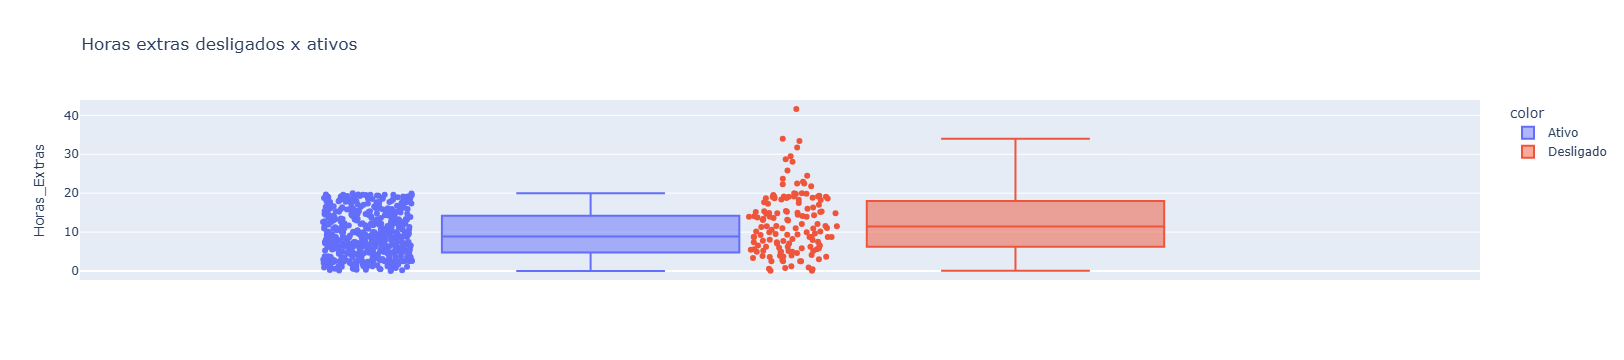

In [21]:
# boxplot Horas extras desligados x ativos

fig = px.box(rh, y='Horas_Extras',color=rh['Desligamento'].map({0: 'Ativo', 1: 'Desligado'}), points="all",
             title='Horas extras desligados x ativos')
fig.show()

O gráfico acima sugere que funcionários desligados trabalharam mais horas extras do que os funcionários ativos.

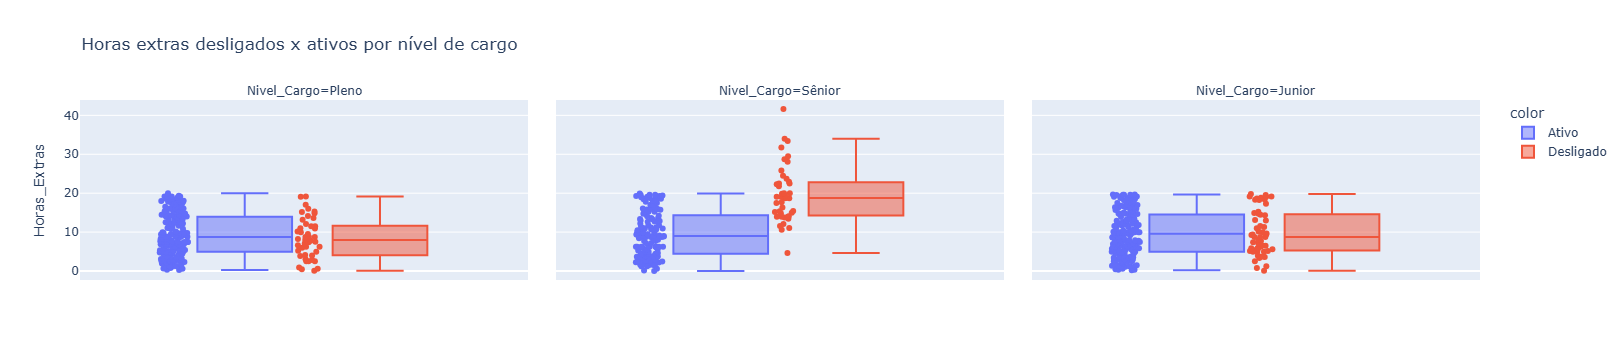

In [22]:
# boxplot Horas extras desligados x ativos por nível de cargo

fig = px.box(rh, y='Horas_Extras', color=rh['Desligamento'].map({0: 'Ativo', 1: 'Desligado'}),points="all", facet_col='Nivel_Cargo',
             title='Horas extras desligados x ativos por nível de cargo')
fig.show()

Fazendo a mesma observação por nível de cargo fica mais evidente a diferença entre os grupos ativos e desligados.
* Funcionários sêniors que foram desligados curiosamente trabalharam mais horas extras do que os sêniors ativos.
* Plenos desligados aparentam ter trabalhado menos horas extras do que o grupo dos plenos ativos.
* Não há indícios de diferenças para o grupo Junior.

## Teste de significância estatística:
O objetivo do teste é comprovar se a diferença observada visualmente nos gráficos é estatisticamente significativa.

In [23]:
# Função teste t para significância estatística

def Ttest(x0, x1):
    '''
    É importante garantir que as suposições do teste t sejam atendidas:
    1) As amostras devem ser independentes.
    2) As amostras devem ser aproximadamente normalmente distribuídas (especialmente importante para amostras pequenas).
    3) As variâncias das duas populações devem ser iguais (ou aproximadamente iguais). Se as variâncias forem diferentes, você pode usar o parâmetro equal_var=False no ttest_ind.
    '''
    # Teste de igualdade de variâncias
    stat, p_levene = levene(x0, x1)

    if p_levene > 0.05:
        # Variâncias iguais
        t_stat, p_value = ttest_ind(x0, x1, equal_var=True)
        var_type = "iguais"
    else:
        # Variâncias desiguais
        t_stat, p_value = ttest_ind(x0, x1, equal_var=False)
        var_type = "desiguais"

    if p_value < 0.05:
        conclusion = "Rejeitamos a hipótese nula. \nHá uma diferença estatisticamente significativa entre as médias dos dois grupos."
    else:
        conclusion = "Aceitamos a hipótese nula. \nNão há diferença estatisticamente significativa entre as médias dos dois grupos."

    print(f'Resultado do teste t para {x0.name}:\n')
    print(f'{conclusion}\n')
    print(f'Teste t com variâncias {var_type}:')
    print(f't-stat = {t_stat}')
    print(f'p-value = {p_value}')

### Seniors

In [24]:
# filtrando Horas Extras de Seniors Desligados e ativos
senior_0_horas_extras = rh.loc[(rh.Desligamento==0) & (rh.Nivel_Cargo=='Sênior'), 'Horas_Extras']
senior_1_horas_extras = rh.loc[(rh.Desligamento==1) & (rh.Nivel_Cargo=='Sênior'), 'Horas_Extras']

In [25]:
# Teste t Horas Extras funcionários Seniors grupo Desligado e Ativo
Ttest(senior_0_horas_extras, senior_1_horas_extras)

Resultado do teste t para Horas_Extras:

Rejeitamos a hipótese nula. 
Há uma diferença estatisticamente significativa entre as médias dos dois grupos.

Teste t com variâncias iguais:
t-stat = -9.642744592205673
p-value = 3.6609453266764304e-18


In [26]:
# Diferença percentual entre os grupos
senior_1_horas_extras.mean() /  senior_0_horas_extras.mean() -1

1.077456752946365

### Plenos

In [27]:
# filtrando Horas Extras de pleno_1_horas_extras Desligados e ativos
pleno_0_horas_extras = rh.loc[(rh.Desligamento==0) & (rh.Nivel_Cargo=='Pleno'), 'Horas_Extras']
pleno_1_horas_extras = rh.loc[(rh.Desligamento==1) & (rh.Nivel_Cargo=='Pleno'), 'Horas_Extras']

In [28]:
# Executando teste e resultado
Ttest(pleno_0_horas_extras, pleno_1_horas_extras)

Resultado do teste t para Horas_Extras:

Aceitamos a hipótese nula. 
Não há diferença estatisticamente significativa entre as médias dos dois grupos.

Teste t com variâncias iguais:
t-stat = 1.0152189690543596
p-value = 0.3111016683529105


### Conclusão

# Os funcionários de nível sênior que foram desligados trabalharam mais horas extras na média do que os funcionários sêniors ativos.

> Essa diferença é relevante pois é estatisticamente significativa.


Grupo de Desligados de Nível Senior:

* Todos fizeram acima de 4h extras
* A amplitude de horas extras é maior
* Quase todos trabalharam mais que a mediana de horas extras dos senior ativos
* A mediana de horas extras é o dobro dos demais níveis de cargo tanto ativos como inativos.


Horas Extras dos funcionários Sêniors (possibilidades):

* Deadlines: atender demandas urgentes.
* Imprevistos: realizar tarefas fora do cronograma.
* Revisões: revisar o trabalho da equipe e de outras colegas.
* Ineficiência: mais tempo para cumprir sua agenda.

# Pontuação desempenho

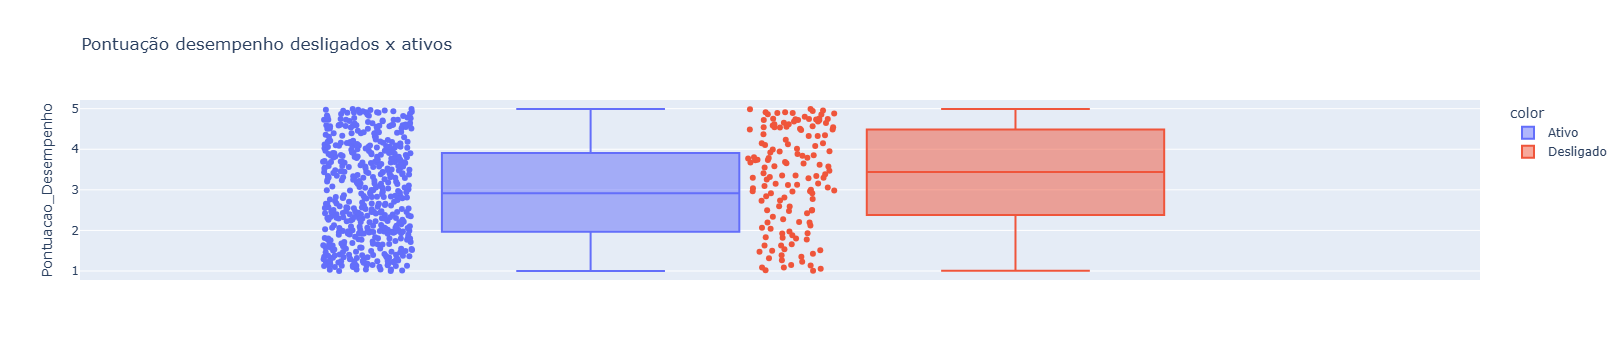

In [29]:
# boxplot Pontuação desempenho desligados x ativos
fig = px.box(rh, y='Pontuacao_Desempenho',color=rh['Desligamento'].map({0: 'Ativo', 1: 'Desligado'}), points="all", title='Pontuação desempenho desligados x ativos')
fig.show()

Há indícios de que os funcionários que foram desligados tinham em média uma pontuação de desempenho superior aos funcionários ativos.

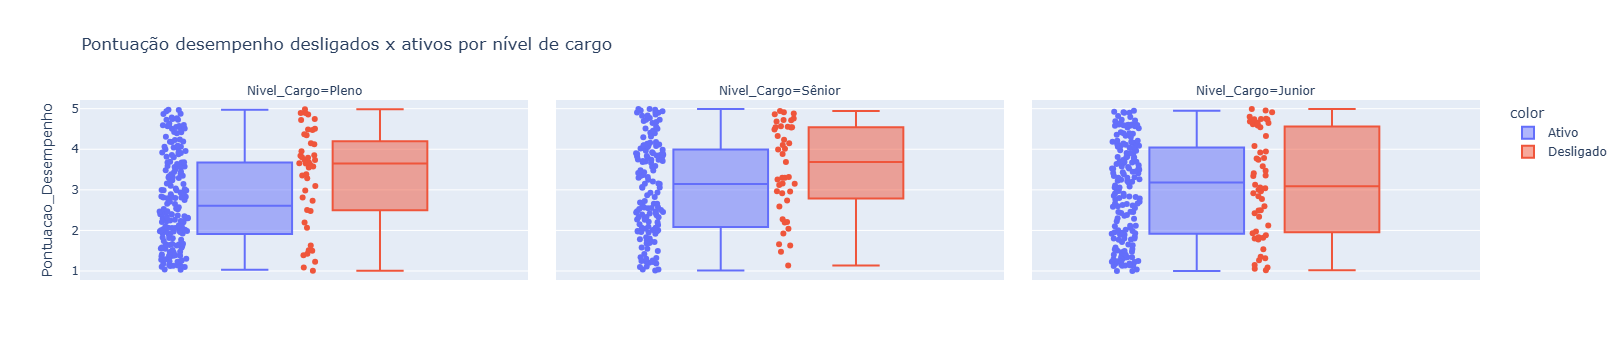

In [30]:
# boxplot Pontuação desempenho desligados x ativos por nível de cargo
fig = px.box(rh, facet_col='Nivel_Cargo', y='Pontuacao_Desempenho',color=rh['Desligamento'].map({0: 'Ativo', 1: 'Desligado'}), points="all",
             title='Pontuação desempenho desligados x ativos por nível de cargo')
fig.show()

A visualização detalhada sugere que:
* Funcionários desligados pleno e sênior tinham uma pontuação de desempenho superior aos funcionários ativos ao respectivo nível de cargo.
* A diferença no grupo Junior é sutil mas também será Investigada.

## Teste de significância estatística
Validando as observações realizadas

### Pleno

In [31]:
# filtrando
pleno_0_Pontuacao_Desempenho = rh.loc[(rh.Desligamento==0) & (rh.Nivel_Cargo=='Pleno'), 'Pontuacao_Desempenho']
pleno_1_Pontuacao_Desempenho = rh.loc[(rh.Desligamento==1) & (rh.Nivel_Cargo=='Pleno'), 'Pontuacao_Desempenho']

In [32]:
# Executando teste e resultado
Ttest(pleno_0_Pontuacao_Desempenho, pleno_1_Pontuacao_Desempenho)

Resultado do teste t para Pontuacao_Desempenho:

Rejeitamos a hipótese nula. 
Há uma diferença estatisticamente significativa entre as médias dos dois grupos.

Teste t com variâncias iguais:
t-stat = -2.8286293730810286
p-value = 0.005100672222207186


In [33]:
# Diferença percentual entre os grupos
pleno_1_Pontuacao_Desempenho.mean() / pleno_0_Pontuacao_Desempenho.mean() - 1

0.19220883842267278

### Senior

In [34]:
# filtrando
senior_0_Pontuacao_Desempenho = rh.loc[(rh.Desligamento==0) & (rh.Nivel_Cargo=='Sênior'), 'Pontuacao_Desempenho']
senior_1_Pontuacao_Desempenho = rh.loc[(rh.Desligamento==1) & (rh.Nivel_Cargo=='Sênior'), 'Pontuacao_Desempenho']

In [35]:
# Executando teste e resultado
Ttest(senior_0_Pontuacao_Desempenho, senior_1_Pontuacao_Desempenho)

Resultado do teste t para Pontuacao_Desempenho:

Rejeitamos a hipótese nula. 
Há uma diferença estatisticamente significativa entre as médias dos dois grupos.

Teste t com variâncias iguais:
t-stat = -2.3142692070934796
p-value = 0.021722258850368416


In [36]:
# Diferença percentual entre os grupos
senior_1_Pontuacao_Desempenho.mean() / senior_0_Pontuacao_Desempenho.mean() - 1

0.1490669436491312

### Junior

In [37]:
# filtrando
junior_0_Pontuacao_Desempenho = rh.loc[(rh.Desligamento==0) & (rh.Nivel_Cargo=='Junior'), 'Pontuacao_Desempenho']
junior_1_Pontuacao_Desempenho = rh.loc[(rh.Desligamento==1) & (rh.Nivel_Cargo=='Junior'), 'Pontuacao_Desempenho']

In [38]:
# Executando teste e resultado
Ttest(junior_0_Pontuacao_Desempenho, junior_1_Pontuacao_Desempenho)

Resultado do teste t para Pontuacao_Desempenho:

Aceitamos a hipótese nula. 
Não há diferença estatisticamente significativa entre as médias dos dois grupos.

Teste t com variâncias iguais:
t-stat = -0.8236518450614211
p-value = 0.41098695830965115


### Conclusão
Curiosamente os grupos de funcionários plenos e sêniors que foram desligados tem uma pontuação de desempenho mais alta na média do que os grupos de funcionários que estão ativos respectivamente.

> As diferenças observadas são estatisticamente Significativas.


# Satisfação trabalho

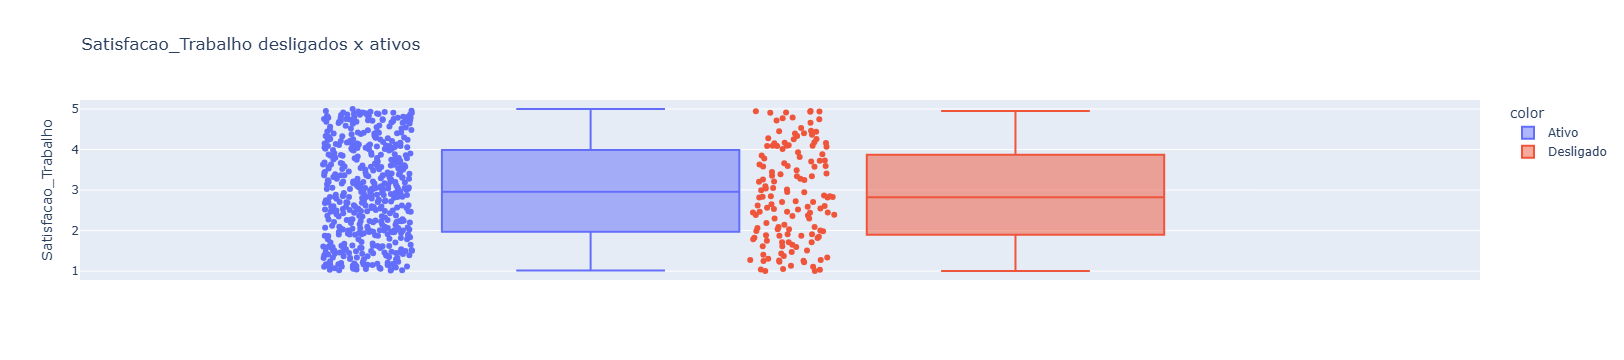

In [39]:
# boxplot Pontuação desempenho desligados x ativos por nível de cargo
fig = px.box(rh, y='Satisfacao_Trabalho', color=rh['Desligamento'].map({0: 'Ativo', 1: 'Desligado'}), points="all", title='Satisfacao_Trabalho desligados x ativos')
fig.show()

A princípio não há indícios de diferença entre os grupos de funcionários desligados e ativos quanto à satisfação do trabalho.

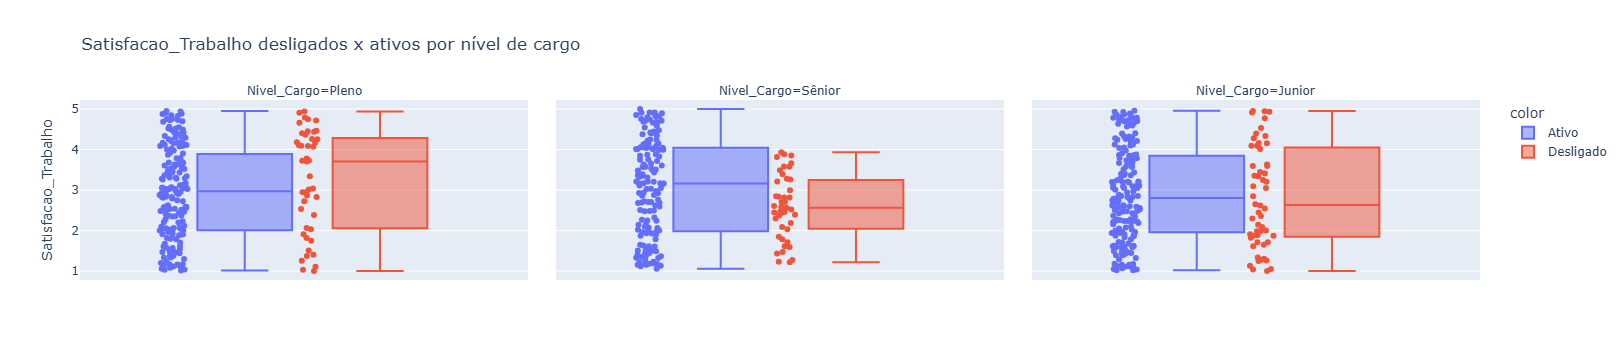

In [40]:
# boxplot Pontuação desempenho desligados x ativos por nível de cargo
fig = px.box(rh, facet_col='Nivel_Cargo', y='Satisfacao_Trabalho', color=rh['Desligamento'].map({0: 'Ativo', 1: 'Desligado'}), points="all",
             title='Satisfacao_Trabalho desligados x ativos por nível de cargo')
fig.show()

Uma análise mais detalhada indica que existem diferenças que devem ser investigadas:
* Plenos que foram desligados aparentemente tinham uma satisfação com o trabalho mais alta na média do que os ativos.
* Já o sêniors que foram desligados aparentemente tinham em média uma satisfação com o trabalho mais baixa do que os ativos.
* Não há indícios de diferença entre os grupos dos funcionários de nível Junior.

## Teste de significância estatística
Validando as observações realizadas

### Senior

In [41]:
# filtrando
senior_0_Satisfacao_Trabalho = rh.loc[(rh.Desligamento==0) & (rh.Nivel_Cargo=='Sênior'), 'Satisfacao_Trabalho']
senior_1_Satisfacao_Trabalho = rh.loc[(rh.Desligamento==1) & (rh.Nivel_Cargo=='Sênior'), 'Satisfacao_Trabalho']

In [42]:
# Executando teste e resultado
Ttest(senior_0_Satisfacao_Trabalho, senior_1_Satisfacao_Trabalho)

Resultado do teste t para Satisfacao_Trabalho:

Rejeitamos a hipótese nula. 
Há uma diferença estatisticamente significativa entre as médias dos dois grupos.

Teste t com variâncias desiguais:
t-stat = 3.0061199110354195
p-value = 0.0033251521239912193


In [43]:
# Diferença percentual entre os grupos
senior_1_Satisfacao_Trabalho.mean() / senior_0_Satisfacao_Trabalho.mean() - 1

-0.1516424777967078

### Pleno

In [44]:
# filtrando
pleno_0_Satisfacao_Trabalho = rh.loc[(rh.Desligamento==0) & (rh.Nivel_Cargo=='Pleno'), 'Satisfacao_Trabalho']
pleno_1_Satisfacao_Trabalho = rh.loc[(rh.Desligamento==1) & (rh.Nivel_Cargo=='Pleno'), 'Satisfacao_Trabalho']

In [45]:
# Executando teste e resultado
Ttest(pleno_0_Satisfacao_Trabalho, pleno_1_Satisfacao_Trabalho)

Resultado do teste t para Satisfacao_Trabalho:

Aceitamos a hipótese nula. 
Não há diferença estatisticamente significativa entre as médias dos dois grupos.

Teste t com variâncias iguais:
t-stat = -1.6069674607996576
p-value = 0.10947648555412541


### Conclusão
O grupo de funcionários sêniors que foram desligados tinham um nível de satisfação com o trabalho inferior aos grupo de funcionários seniors ativos.

> A diferença observada entre os grupos é estatisticamente significativa

# Meses de serviço

In [46]:
# Média meses de serviço funcionários desligados por nível de cargo
pd.DataFrame(round(rh.loc[rh.Desligamento==1, 'Meses_de_Servico'].groupby(rh.Nivel_Cargo).mean(),2))

Meses_de_Servico
Nivel_Cargo                  
Junior                  15.89
Pleno                   18.56
Sênior                  18.56

In [47]:
# Média meses de serviço funcionários desligados por idade e nível de cargo
rh.loc[rh.Desligamento==1, 'Meses_de_Servico'].groupby([rh.Nivel_Cargo, rh.Idade]).mean().unstack(level=0).fillna("")

Nivel_Cargo     Junior      Pleno     Sênior
Idade                                       
18                20.9                      
19               18.75                      
20                13.7                      
21              12.375                      
22               16.25       22.5           
23           15.666667      23.75           
24                13.5       25.0           
25                           21.0           
26                          20.25           
27                      18.833333       25.0
28                          19.25       18.0
29                      19.666667           
30                      13.666667       22.0
31                           16.4       18.5
32                           15.4      18.25
33                           19.0        5.0
34                           12.0       16.5
35                                      23.0
36                                     12.25
38                                      31.0
39                                 21.333333
40                                      26.0
41                                 14.666667
42                                      35.0
43                                      11.0
44                                      23.5
45                                      16.0
46                                      33.0
49                                      14.0

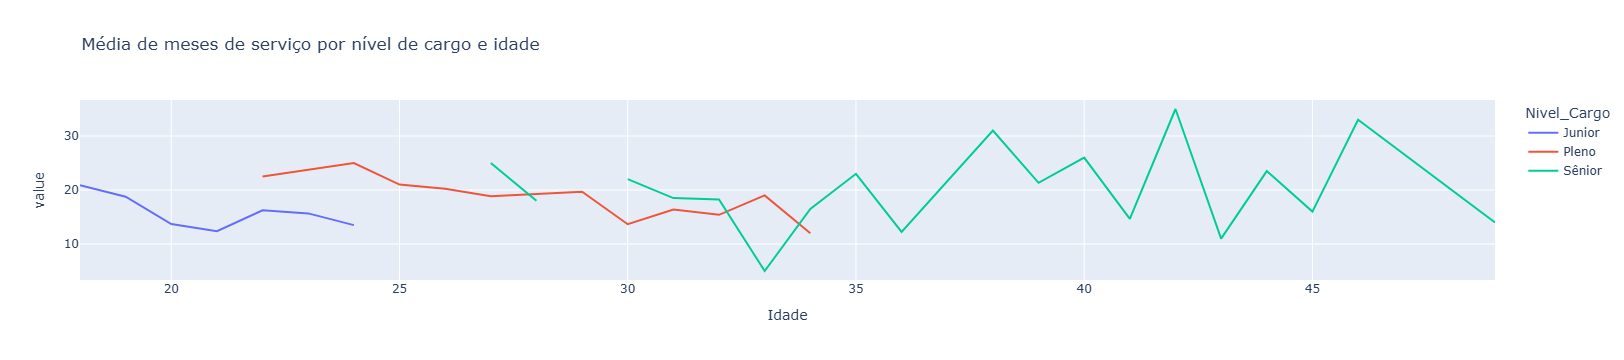

In [48]:
# Média meses de serviço funcionários desligados por idade e nível de cargo (plot)
fig = px.line(rh.loc[rh.Desligamento==1, 'Meses_de_Servico'].groupby([rh.Nivel_Cargo, rh.Idade]).mean().unstack(level=0).fillna(""),
             title=' Média de meses de serviço por nível de cargo e idade')
fig.show()

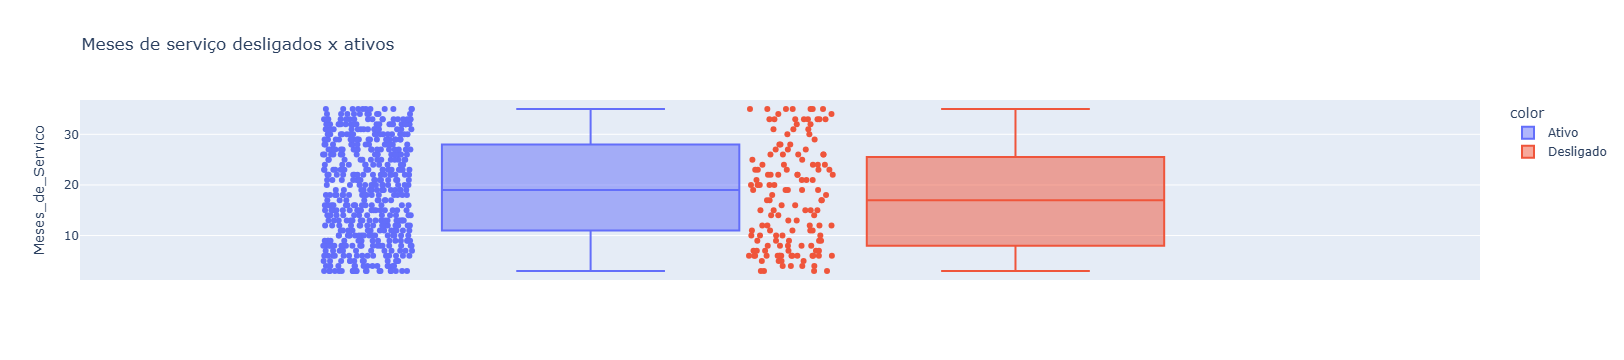

In [49]:
# boxplot Meses de serviço desligados x ativos
fig = px.box(rh, y='Meses_de_Servico', color=rh['Desligamento'].map({0: 'Ativo', 1: 'Desligado'}), points="all",
             title='Meses de serviço desligados x ativos')
fig.show()

Para meses de serviço observamos que o grupo de funcionários desligados em média podem ter trabalhado menos meses de serviço.

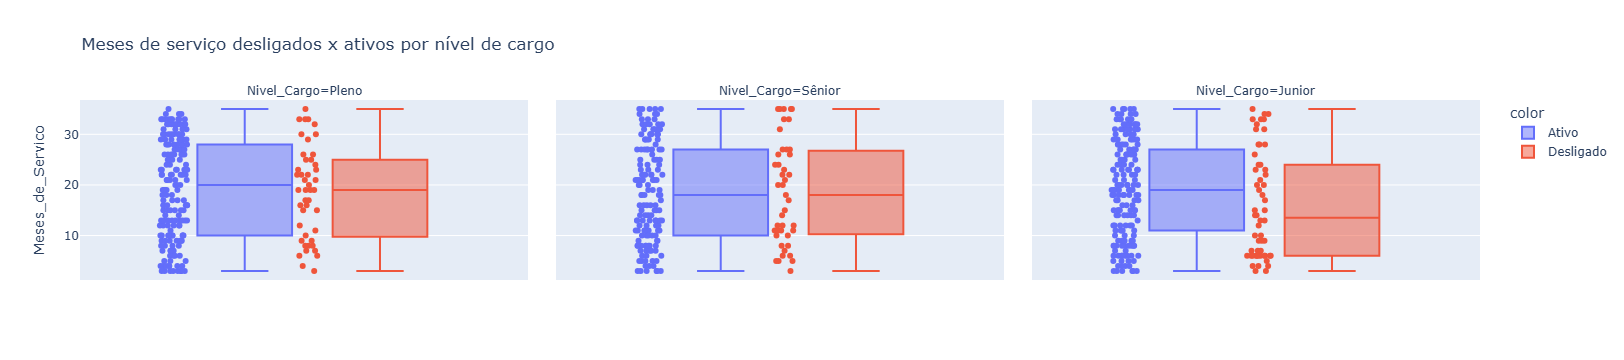

In [50]:
# boxplot Meses de serviço desligados x ativos por nível de cargo
fig = px.box(rh, facet_col='Nivel_Cargo', y='Meses_de_Servico', color=rh['Desligamento'].map({0: 'Ativo', 1: 'Desligado'}), points="all",
             title='Meses de serviço desligados x ativos por nível de cargo')
fig.show()

Na observação detalhada por nível de cargo fica evidente que no grupo Junior desligados teve uma média de meses de serviço inferior aos juniors ativos e aos demais funcionários também.

## Teste de significância estatística
Validando as observações realizadas

### Júnior

In [51]:
# filtrando
junior_0_Meses_de_Servico = rh.loc[(rh.Desligamento==0) & (rh.Nivel_Cargo=='Junior'), 'Meses_de_Servico']
junior_1_Meses_de_Servico = rh.loc[(rh.Desligamento==1) & (rh.Nivel_Cargo=='Junior'), 'Meses_de_Servico']

In [52]:
# Executando teste e resultado
Ttest(junior_0_Meses_de_Servico, junior_1_Meses_de_Servico)

Resultado do teste t para Meses_de_Servico:

Rejeitamos a hipótese nula. 
Há uma diferença estatisticamente significativa entre as médias dos dois grupos.

Teste t com variâncias iguais:
t-stat = 2.2169993114687716
p-value = 0.02759763426643298


In [53]:
# Diferença percentual entre os grupos
junior_1_Meses_de_Servico.mean() / junior_0_Meses_de_Servico.mean() - 1

-0.17166203937405344

### Pleno

In [54]:
# filtrando
pleno_0_Meses_de_Servico = rh.loc[(rh.Desligamento==0) & (rh.Nivel_Cargo=='Pleno'), 'Meses_de_Servico']
pleno_1_Meses_de_Servico = rh.loc[(rh.Desligamento==1) & (rh.Nivel_Cargo=='Pleno'), 'Meses_de_Servico']

In [55]:
# Executando teste e resultado
Ttest(pleno_0_Meses_de_Servico, pleno_1_Meses_de_Servico)

Resultado do teste t para Meses_de_Servico:

Aceitamos a hipótese nula. 
Não há diferença estatisticamente significativa entre as médias dos dois grupos.

Teste t com variâncias iguais:
t-stat = 0.4728443754591665
p-value = 0.6367866793871204


### Conclusão
O grupo de funcionários de nível Junior que foram desligados tinham na média, menos meses de serviço em relação aos funcionários Juniors que se mantiveram ativos.

> Essa diferença é estatisticamente significativa.

# Idade

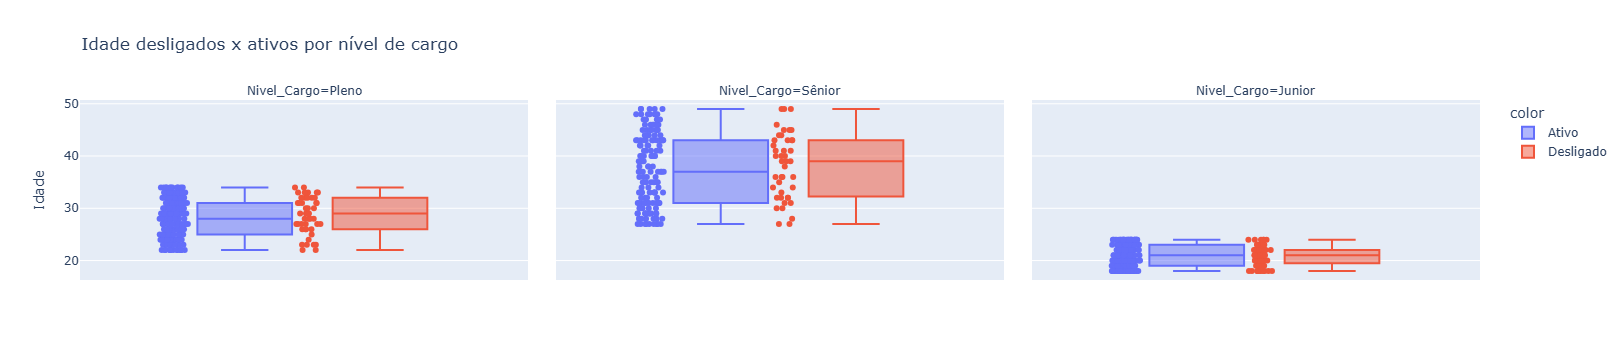

In [56]:
# boxplot Idade desligados x ativos por nível de cargo
fig = px.box(rh, facet_col='Nivel_Cargo', y='Idade', color=rh['Desligamento'].map({0: 'Ativo', 1: 'Desligado'}), points="all",
             title='Idade desligados x ativos por nível de cargo')
fig.show()

## Teste de significância estatística

### Senior

In [57]:
# filtrando
senior_0_Idade = rh.loc[(rh.Desligamento==0) & (rh.Nivel_Cargo=='Sênior'), 'Idade']
senior_1_Idade = rh.loc[(rh.Desligamento==1) & (rh.Nivel_Cargo=='Sênior'), 'Idade']

In [58]:
# Executando teste e resultado
Ttest(senior_0_Idade, senior_1_Idade)

Resultado do teste t para Idade:

Aceitamos a hipótese nula. 
Não há diferença estatisticamente significativa entre as médias dos dois grupos.

Teste t com variâncias iguais:
t-stat = -0.6663414688696754
p-value = 0.5060011391944796


### Pleno

In [59]:
# filtrando
pleno_0_Idade = rh.loc[(rh.Desligamento==0) & (rh.Nivel_Cargo=='Pleno'), 'Idade']
pleno_1_Idade = rh.loc[(rh.Desligamento==1) & (rh.Nivel_Cargo=='Pleno'), 'Idade']

In [60]:
# Executando teste e resultado
Ttest(pleno_0_Idade, pleno_1_Idade)

Resultado do teste t para Idade:

Aceitamos a hipótese nula. 
Não há diferença estatisticamente significativa entre as médias dos dois grupos.

Teste t com variâncias iguais:
t-stat = -0.8251370019765465
p-value = 0.41017560337086545


### Junior

In [61]:
# filtrando
junior_0_Idade = rh.loc[(rh.Desligamento==0) & (rh.Nivel_Cargo=='Junior'), 'Idade']
junior_1_Idade = rh.loc[(rh.Desligamento==1) & (rh.Nivel_Cargo=='Junior'), 'Idade']

In [62]:
# Executando teste e resultado
Ttest(junior_0_Idade, junior_1_Idade)

Resultado do teste t para Idade:

Aceitamos a hipótese nula. 
Não há diferença estatisticamente significativa entre as médias dos dois grupos.

Teste t com variâncias iguais:
t-stat = 0.017014252541093476
p-value = 0.9864399316662662


### Conclusão
Não há diferença entre as médias de idades de funcionários desligados e funcionários ativos por nível de cargo.

> As diferenças não são estatisticamente significativas.

# Salário

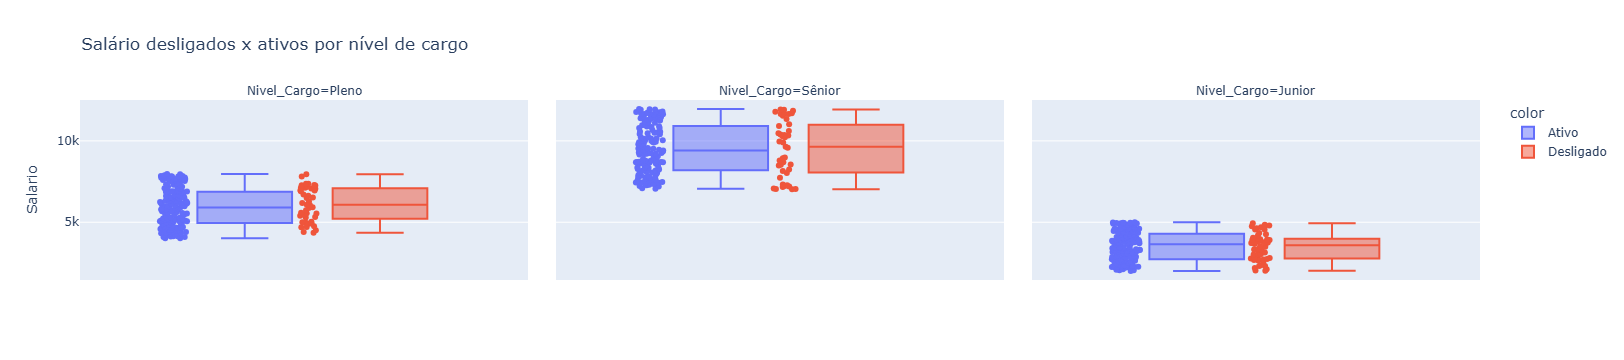

In [63]:
# boxplot Salário desligados x ativos por nível de cargo
fig = px.box(rh, facet_col='Nivel_Cargo', y='Salario', color=rh['Desligamento'].map({0: 'Ativo', 1: 'Desligado'}), points="all",
             title='Salário desligados x ativos por nível de cargo')
fig.show()

## Conclusão
Nâo há indicios de diferenças entre salários de funcionários desligados e funcionários ativos por nível de cargo.

# Conclusão da Análise:
A análise exploratória de dados indica que:

**De Jun/21 a Fev/2024**

> Ocorreram contratações mensais para todos os níveis de cargo. E a empresa cresceu consideravelmente.
* Total de funcionarios em Jun/2021: 18
* Total de funcionarios em Fev/2024: 650
* Periodo: 33 meses
* Contratações: 33
* A média de funcionarios por contratação: 19.7
* Taxa de crescimento: 3511%

**Em Março e Abril de 2024.**
> Não houveram contratações.


**Em 14 Maio de 2024**,
> Ocorreu um desligamento em massa.
* Funcionarios desligados: 144
* Taxa de turnover: 22%

A alta taxa de desligamento de funcionários em um único dia indica a ocorrência de um layoff. Esse evento pode ter sido motivado por fatores externos e estruturais. Neste contexto, características individuais dos funcionários, como desempenho, satisfação, horas extras, tempo de serviço, idade e salário, foram utilizadas como critérios para os desligamentos, baseando-se nas diferenças estatisticamente significativas observadas entre as médias dos grupos comparados.

## Resultados por Nível de Cargo:

### Sêniors:
Os funcionários de nível sênior que foram desligados trabalharam, em média, o dobro de horas extras (102%) em relação aos funcionários sêniors ativos. Curiosamente, também tinham uma pontuação de desempenho mais alta (14.9%) em média, do que os funcionários ativos. No entanto, o nível de satisfação com o trabalho desses funcionários desligados era significativamente mais baixo (-15%).

> Satisfação no trabalho pode ter sido um critério prioritário na seleção dos funcionários que seriam mantidos.

Recomendações:

* Revisão dos critérios de desligamentos. Pois foram desligados os funcionários com melhor desempenho em média.
* Avaliar e ajustar a carga de trabalho para evitar excesso de horas extras, que pode estar contribuindo para a insatisfação.
* Feedback regular
* Programas de bem-estar

### Plenos:
O grupo de funcionários plenos desligados também registrou, em média, maior pontuação de desempenho (19.2%) e satisfação no trabalho (10%) em relação aos  funcionários plenos ativos. Portanto, não podemos inferir um critério claro para a seleção dos funcionários plenos desligados.

>Fatores não detectáveis nos dados, como soft skills, comunicação e relacionamento, podem ter sido considerados.

Recomendações:

* Revisão dos critérios de desligamentos. Pois foram desligados os funcionários com melhor desempenho e satisfação em média.
* Definir e comunicar os critérios de desempenho e retenção.

### Juniors:
Funcionários de nível júnior delsigados tinham em média, menos meses de serviço (-17%) em comparação com os funcionários juniores ativos.

> O tempo de serviço parece ter sido um critério importante na escolha dos funcionários juniores.

Recomendações:

* Implementação de programas de integração.
* Oferecer planos de carreira e desenvolvimento profissional para aumentar a retenção de talentos promissores.

# Obrigado!